<a href="https://colab.research.google.com/github/Prajith3/Real-World-Analytics/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Part A**

**Answer 1.1**

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=dea5f2db8f9fe2acc33d5635b320dfd2b96fdd9545d6a0ecc2fbc2d563bbcf0e
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget
import json
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt



In [3]:
# read json file
link_to_data = 'https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2022/data/assignment2data.json'
DataSet = wget.download(link_to_data)

In [4]:
#load json file
pd_df = pd.read_json('/content/assignment2data.json', lines=True, orient='records')

In [5]:
#convert json file to csv

dfcsv = pd_df.to_csv('/content/assignment2data.csv', index=False)

#read the csv file
df = pd.read_csv('/content/assignment2data.csv')

#print the shape
print("The shape of the assessemnt 2 dataframe is:", df.shape)

The shape of the assessemnt 2 dataframe is: (46279, 43)


In [6]:
# Selecting duplicate rows except first occurrence based on all columns
duplicate = df[df.duplicated()]
 
#Shape of duplicates
print("The shape of duplicate the rows is:", duplicate.shape)

The shape of duplicate the rows is: (249, 43)


In [7]:
#remove the duplicate rows
df_clean = df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

#Shape of clean dataframe
duplicate_row = len(df)-len(df_clean)
print('Number of duplicate rows are : {}'.format(duplicate_row))
print("The shape of the assessment 2 data, cleaned of duplicate rows is:", df_clean.shape)

Number of duplicate rows are : 249
The shape of the assessment 2 data, cleaned of duplicate rows is: (46030, 43)


**Answer 1.2**

In [8]:
#Alternative method
'''
def missingdf(df):
    columns = ["column_name", "percent_missing"]
    rate_list = {}
    for i in df.columns:
        rate_list[i] = df[i].isna().sum()/len(df)
    rate_df = pd.DataFrame.from_dict(rate_list, orient='index')
    rate_df = rate_df.reset_index(drop=False)
    rate_df.columns = columns
    return rate_df

param = missingdf(df_clean)
print(param)
'''
def missingdf(df):
  rate = list(round(df.isnull().sum()/len(df)*100,1))
  col_names = list(df.columns)
  rate_df = pd.DataFrame()
  rate_df['Column Names'] = col_names
  rate_df['Percent Missing'] = rate

  print(rate_df.to_string(index=False))

missingdf(df_clean)

            Column Names  Percent Missing
              sacc_items              0.0
             work_orders              0.0
            female_items              0.0
is_newsletter_subscriber              0.0
              male_items              0.0
       afterpay_payments              0.0
            msite_orders              0.0
              wftw_items              0.0
              mapp_items              0.0
                  orders              0.0
             cc_payments              0.0
             curvy_items              0.0
         paypal_payments              0.0
              macc_items              0.0
                 cancels              0.0
                 revenue              0.0
                 returns              0.0
 other_collection_orders              0.0
      parcelpoint_orders              0.0
             customer_id              0.0
          android_orders              0.0
   days_since_last_order              0.0
                vouchers          

**Answer 1.3**

In [9]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

def column_list(df):
  numerical_list, categorical_list = list(),list()

  for i in df.columns:
    if is_numeric_dtype(df[i]):
      numerical_list.append(i)
    elif is_string_dtype(df[i]):
      categorical_list.append(i)
  return numerical_list,categorical_list

numerical_list,categorical_list = column_list(df_clean)
print(numerical_list)
print(categorical_list)

['sacc_items', 'work_orders', 'female_items', 'male_items', 'afterpay_payments', 'msite_orders', 'wftw_items', 'mapp_items', 'orders', 'cc_payments', 'curvy_items', 'paypal_payments', 'macc_items', 'cancels', 'revenue', 'returns', 'other_collection_orders', 'parcelpoint_orders', 'android_orders', 'days_since_last_order', 'vouchers', 'average_discount_used', 'shipping_addresses', 'redpen_discount_used', 'mftw_items', 'days_since_first_order', 'unisex_items', 'home_orders', 'coupon_discount_applied', 'desktop_orders', 'ios_orders', 'apple_payments', 'wspt_items', 'wacc_items', 'items', 'mspt_items', 'devices', 'different_addresses', 'wapp_items', 'other_device_orders', 'average_discount_onoffer']
['is_newsletter_subscriber', 'customer_id']


In [10]:
#Stats of the numerical column
df_clean[numerical_list].describe()

,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,...,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
count,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,...,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000,46030.000000
mean,0.087899,0.240995,6.472800,1.720660,0.053595,0.978557,1.633826,0.926613,4.111362,0.642972,...,0.000565,0.378753,0.573908,8.583750,0.116229,1.277580,0.116402,3.800782,0.000043,0.190171
std,0.539604,1.565071,17.830007,5.468827,0.225220,2.859161,4.088452,3.689578,8.122569,0.479128,...,0.023760,1.712662,2.542536,19.959377,0.716745,0.533286,0.320710,12.679782,0.009322,0.190702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.150000
75%,0.000000,0.000000,5.000000,1.000000,0.000000,1.000000,2.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.314300
max,29.000000,84.000000,537.000000,273.000000,1.000000,172.000000,261.000000,151.000000,665.000000,1.000000,...,1.000000,56.000000,353.000000,701.000000,38.000000,3.000000,1.000000,409.000000,2.000000,1.000000


**Answer 1.4**

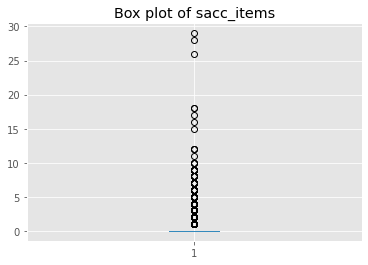

The minimum value of sacc_items is 0
The maximum value of sacc_items is 29
The median value of sacc_items is 0.0
The mean value of sacc_items is 0.0878991961764067




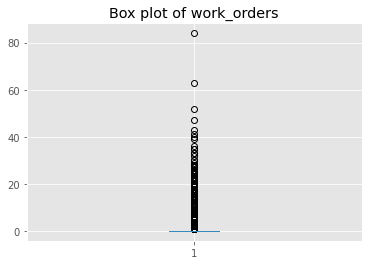

The minimum value of work_orders is 0
The maximum value of work_orders is 84
The median value of work_orders is 0.0
The mean value of work_orders is 0.2409950032587443




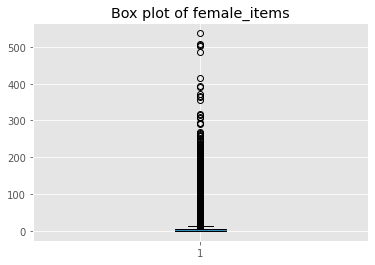

The minimum value of female_items is 0
The maximum value of female_items is 537
The median value of female_items is 2.0
The mean value of female_items is 6.472800347599391




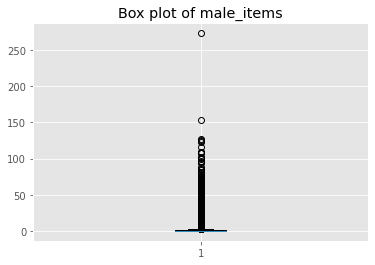

The minimum value of male_items is 0
The maximum value of male_items is 273
The median value of male_items is 0.0
The mean value of male_items is 1.720660438844232




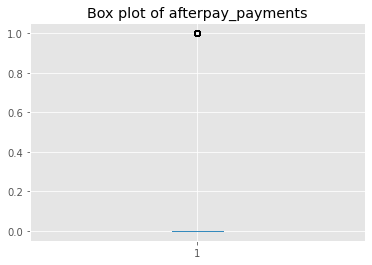

The minimum value of afterpay_payments is 0
The maximum value of afterpay_payments is 1
The median value of afterpay_payments is 0.0
The mean value of afterpay_payments is 0.053595481207907886




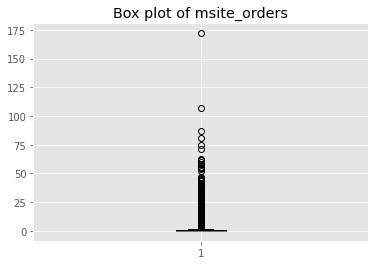

The minimum value of msite_orders is 0
The maximum value of msite_orders is 172
The median value of msite_orders is 0.0
The mean value of msite_orders is 0.9785574625244405




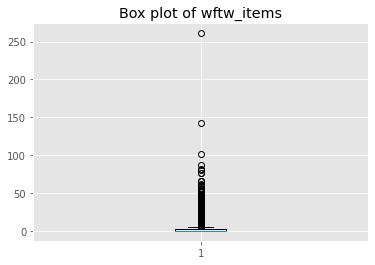

The minimum value of wftw_items is 0
The maximum value of wftw_items is 261
The median value of wftw_items is 0.0
The mean value of wftw_items is 1.6338257658049098




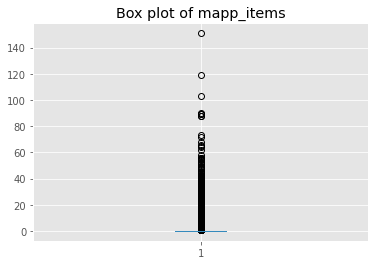

The minimum value of mapp_items is 0
The maximum value of mapp_items is 151
The median value of mapp_items is 0.0
The mean value of mapp_items is 0.9266130784271127




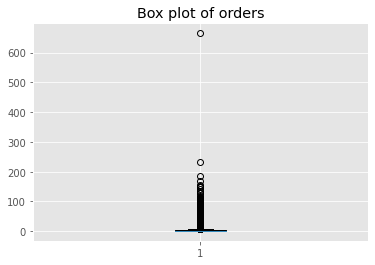

The minimum value of orders is 1
The maximum value of orders is 665
The median value of orders is 2.0
The mean value of orders is 4.111362155116229




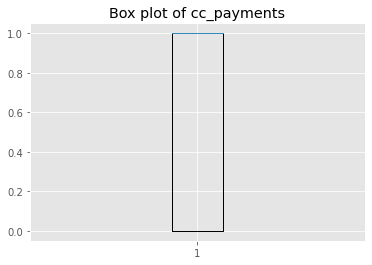

The minimum value of cc_payments is 0
The maximum value of cc_payments is 1
The median value of cc_payments is 1.0
The mean value of cc_payments is 0.6429719747990441




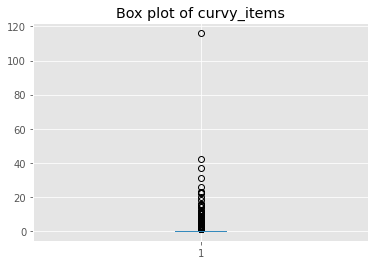

The minimum value of curvy_items is 0
The maximum value of curvy_items is 116
The median value of curvy_items is 0.0
The mean value of curvy_items is 0.04132087768846405




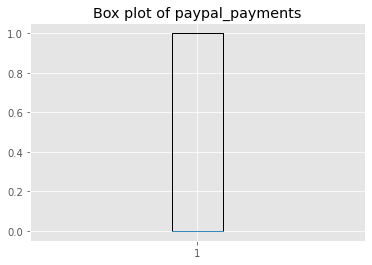

The minimum value of paypal_payments is 0
The maximum value of paypal_payments is 1
The median value of paypal_payments is 0.0
The mean value of paypal_payments is 0.4903758418422768




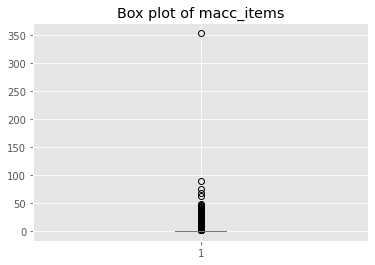

The minimum value of macc_items is 0
The maximum value of macc_items is 353
The median value of macc_items is 0.0
The mean value of macc_items is 0.5739083206604388




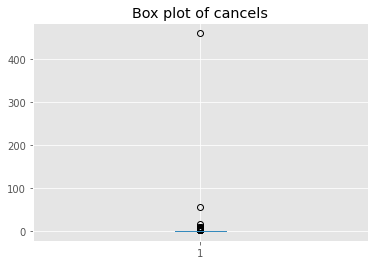

The minimum value of cancels is 0
The maximum value of cancels is 460
The median value of cancels is 0.0
The mean value of cancels is 0.053095807082337604




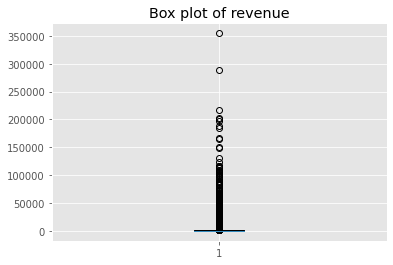

The minimum value of revenue is 0.0
The maximum value of revenue is 354700.16
The median value of revenue is 213.015
The mean value of revenue is 1305.4792324570933




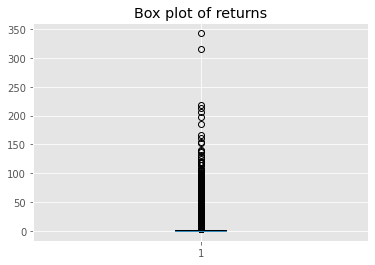

The minimum value of returns is 0
The maximum value of returns is 343
The median value of returns is 0.0
The mean value of returns is 1.6261134043015424




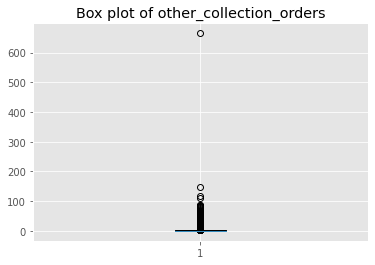

The minimum value of other_collection_orders is 0
The maximum value of other_collection_orders is 665
The median value of other_collection_orders is 1.0
The mean value of other_collection_orders is 2.3083858353247884




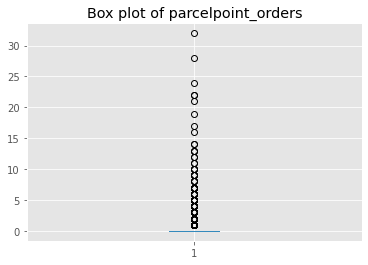

The minimum value of parcelpoint_orders is 0
The maximum value of parcelpoint_orders is 32
The median value of parcelpoint_orders is 0.0
The mean value of parcelpoint_orders is 0.025418205518140342




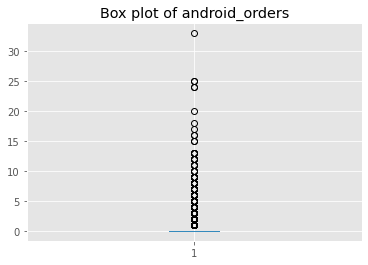

The minimum value of android_orders is 0
The maximum value of android_orders is 33
The median value of android_orders is 0.0
The mean value of android_orders is 0.04316749945687595




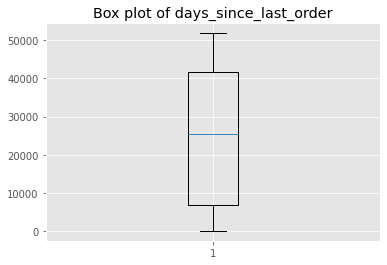

The minimum value of days_since_last_order is 24
The maximum value of days_since_last_order is 51840
The median value of days_since_last_order is 25416.0
The mean value of days_since_last_order is 24535.40021724962




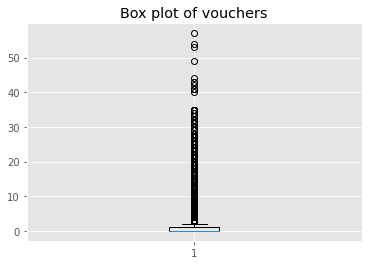

The minimum value of vouchers is 0
The maximum value of vouchers is 57
The median value of vouchers is 0.0
The mean value of vouchers is 0.9418205518140343




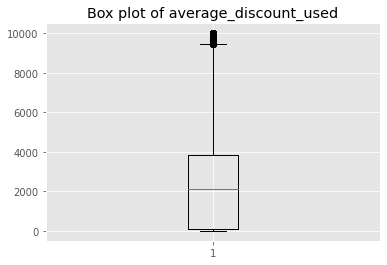

The minimum value of average_discount_used is 0.0
The maximum value of average_discount_used is 10000.0
The median value of average_discount_used is 2122.8225
The mean value of average_discount_used is 2357.1180874668694




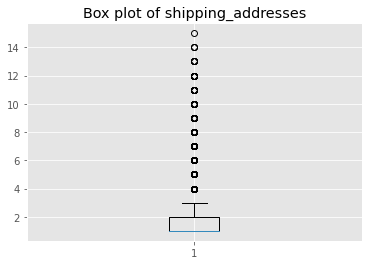

The minimum value of shipping_addresses is 1
The maximum value of shipping_addresses is 15
The median value of shipping_addresses is 1.0
The mean value of shipping_addresses is 1.5010645231370845




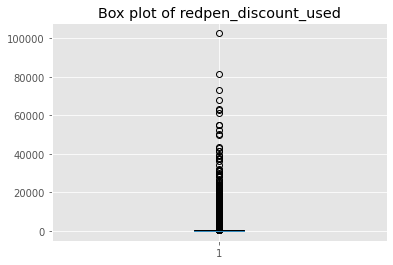

The minimum value of redpen_discount_used is 0.0
The maximum value of redpen_discount_used is 102653.77
The median value of redpen_discount_used is 54.48
The mean value of redpen_discount_used is 435.56769932652617




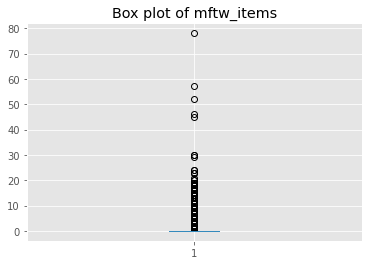

The minimum value of mftw_items is 0
The maximum value of mftw_items is 78
The median value of mftw_items is 0.0
The mean value of mftw_items is 0.4212904627416902




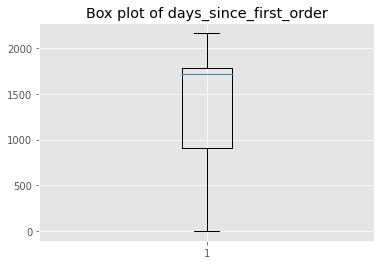

The minimum value of days_since_first_order is 1
The maximum value of days_since_first_order is 2164
The median value of days_since_first_order is 1713.0
The mean value of days_since_first_order is 1371.811601129698




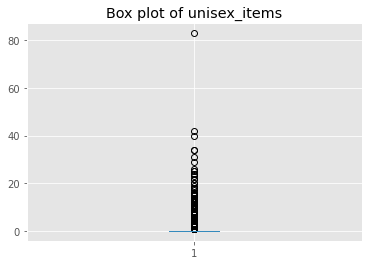

The minimum value of unisex_items is 0
The maximum value of unisex_items is 83
The median value of unisex_items is 0.0
The mean value of unisex_items is 0.3902889419943515




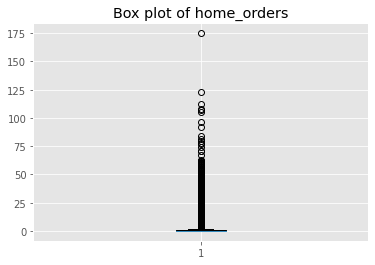

The minimum value of home_orders is 0
The maximum value of home_orders is 175
The median value of home_orders is 0.0
The mean value of home_orders is 1.5365631110145557




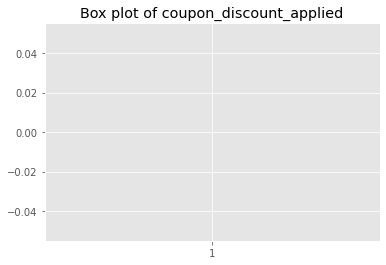

The minimum value of coupon_discount_applied is 0.0
The maximum value of coupon_discount_applied is 33332.26
The median value of coupon_discount_applied is 0.0
The mean value of coupon_discount_applied is 175.1734070228326




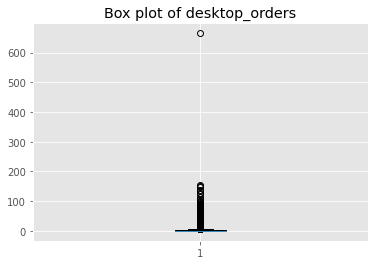

The minimum value of desktop_orders is 0
The maximum value of desktop_orders is 665
The median value of desktop_orders is 1.0
The mean value of desktop_orders is 2.626547903541169




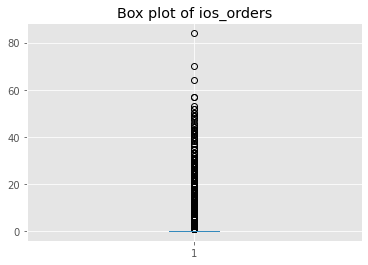

The minimum value of ios_orders is 0
The maximum value of ios_orders is 84
The median value of ios_orders is 0.0
The mean value of ios_orders is 0.4630458396697806




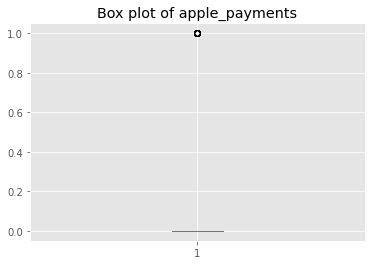

The minimum value of apple_payments is 0
The maximum value of apple_payments is 1
The median value of apple_payments is 0.0
The mean value of apple_payments is 0.0005648490115142299




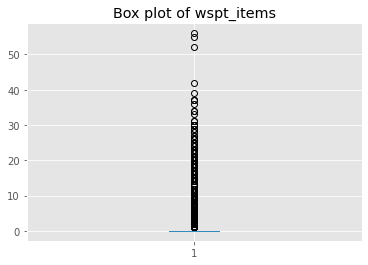

The minimum value of wspt_items is 0
The maximum value of wspt_items is 56
The median value of wspt_items is 0.0
The mean value of wspt_items is 0.3787529871822724




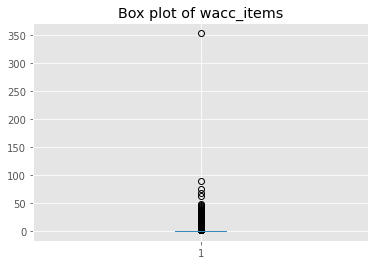

The minimum value of wacc_items is 0
The maximum value of wacc_items is 353
The median value of wacc_items is 0.0
The mean value of wacc_items is 0.5739083206604388




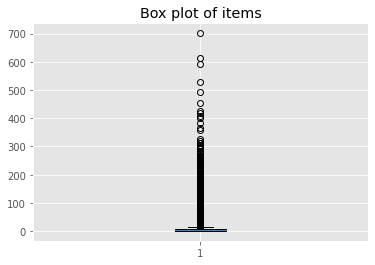

The minimum value of items is 1
The maximum value of items is 701
The median value of items is 3.0
The mean value of items is 8.583749728437976




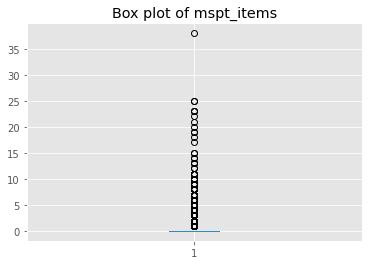

The minimum value of mspt_items is 0
The maximum value of mspt_items is 38
The median value of mspt_items is 0.0
The mean value of mspt_items is 0.11622854660004345




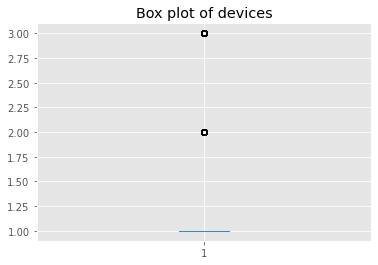

The minimum value of devices is 1
The maximum value of devices is 3
The median value of devices is 1.0
The mean value of devices is 1.2775798392352813




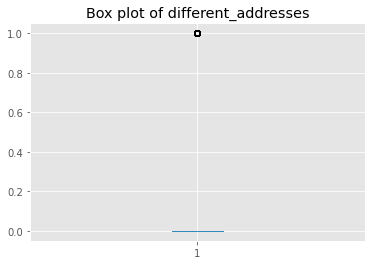

The minimum value of different_addresses is 0
The maximum value of different_addresses is 1
The median value of different_addresses is 0.0
The mean value of different_addresses is 0.11640234629589398




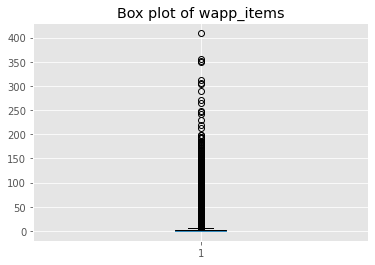

The minimum value of wapp_items is 0
The maximum value of wapp_items is 409
The median value of wapp_items is 0.0
The mean value of wapp_items is 3.8007820986313274




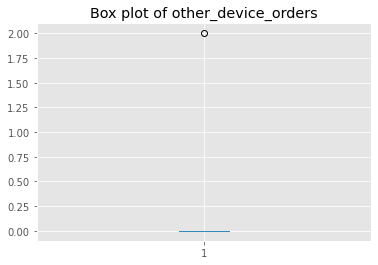

The minimum value of other_device_orders is 0
The maximum value of other_device_orders is 2
The median value of other_device_orders is 0.0
The mean value of other_device_orders is 4.3449923962633065e-05




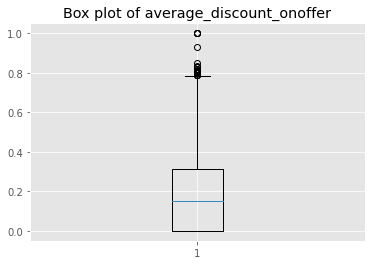

The minimum value of average_discount_onoffer is 0.0
The maximum value of average_discount_onoffer is 1.0
The median value of average_discount_onoffer is 0.15
The mean value of average_discount_onoffer is 0.19017099065826631




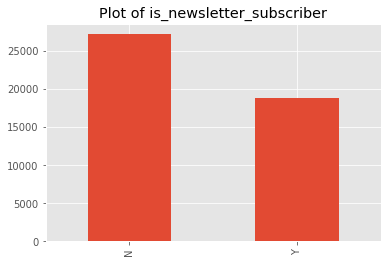

In [40]:
#Identify corrupt data from the cleaned pandas df
import matplotlib.pyplot as plt
import math
from matplotlib.backends.backend_pdf import PdfPages

maxvals = df_clean.max()
minvals = df_clean.min()

df_test = df_clean

#print(type(numerical_cols))
#create a dataframe to store the statistics
columnsx =numerical_list
df_stats = pd.DataFrame(columns=columnsx, index=['Min', 'Max', 'Mean', 'Median'])
df_stats.index = ['Min', 'Max', 'Mean', 'Median']

# Change the column names
#df_stats.columns =numerical_cols+categorical_cols
  
# Change the row indexes
#df_stats.index = ['Row_1', 'Row_2', 'Row_3', 'Row_4']

#create an output file for the plots
plotout = PdfPages("BoxPlots.pdf")  


#For each numerical column plot a box plot and statistics to help identify corruption of anomalies.
for i in numerical_list :
    plt.boxplot(x=df_test[i])
    # Add Title to plot
    plt.title("Box plot of "+str(i))  
    plotout.savefig()
    plt.show()
    print("The minimum value of "+str(i)+" is "+str(minvals[i]))
    print("The maximum value of "+str(i)+" is "+str(maxvals[i]))
    print("The median value of "+str(i)+" is "+str(df_test[i].median()))
    print("The mean value of "+str(i)+" is "+str(df_test[i].mean()))
    print()
    print("")
    df_stats[i]=[minvals[i],maxvals[i],df_test[i].mean(),df_test[i].median()] 
    #add data to a table for easier display
 
#close the plot file
plotout.close()

#customer ID is not really necessary to chart, so will just chart the is_newsletter_subscriber

df_test['is_newsletter_subscriber'].value_counts().plot(kind='bar')
# Add Title to plot
plt.title("Plot of is_newsletter_subscriber")
plt.show()

print()
print("")

In [41]:
#print(df_stats)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(df_stats)
df_stats.to_csv(r'stats.csv')

,sacc_items,work_orders,female_items,male_items,afterpay_payments,msite_orders,wftw_items,mapp_items,orders,cc_payments,curvy_items,paypal_payments,macc_items,cancels,revenue,returns,other_collection_orders,parcelpoint_orders,android_orders,days_since_last_order,vouchers,average_discount_used,shipping_addresses,redpen_discount_used,mftw_items,days_since_first_order,unisex_items,home_orders,coupon_discount_applied,desktop_orders,ios_orders,apple_payments,wspt_items,wacc_items,items,mspt_items,devices,different_addresses,wapp_items,other_device_orders,average_discount_onoffer
Min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000,24.0,0.000,0.000,1.000,0.000,0.000,1.000,0.00,0.000,0.000,0.000,0.000,0.000e+00,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000e+00,0.00
Max,29.000,84.000,537.000,273.000,1.000,172.000,261.000,151.000,665.000,1.000,116.000,1.00,353.000,460.000,354700.160,343.000,665.000,32.000,33.000,51840.0,57.000,10000.000,15.000,102653.770,78.000,2164.000,83.00,175.000,33332.260,665.000,84.000,1.000e+00,56.000,353.000,701.000,38.000,3.000,1.000,409.000,2.000e+00,1.00
Mean,0.088,0.241,6.473,1.721,0.054,0.979,1.634,0.927,4.111,0.643,0.041,0.49,0.574,0.053,1305.479,1.626,2.308,0.025,0.043,24535.4,0.942,2357.118,1.501,435.568,0.421,1371.812,0.39,1.537,175.173,2.627,0.463,5.648e-04,0.379,0.574,8.584,0.116,1.278,0.116,3.801,4.345e-05,0.19
Median,0.000,0.000,2.000,0.000,0.000,0.000,0.000,0.000,2.000,1.000,0.000,0.00,0.000,0.000,213.015,0.000,1.000,0.000,0.000,25416.0,0.000,2122.823,1.000,54.480,0.000,1713.000,0.00,0.000,0.000,1.000,0.000,0.000e+00,0.000,0.000,3.000,0.000,1.000,0.000,0.000,0.000e+00,0.15


**Answer 1.5**

In [12]:
#percentage of customers who have purchased female items have paid by credit card

def female_items_cc_payments_all_cust(y):
  all_cust = len(y)
  cc_payments = len(y[(y['female_items']>0)& (y['cc_payments']>0)])
  return np.round((cc_payments/all_cust)*100, 1)

all_cust_female_items = female_items_cc_payments_all_cust(df_clean)

print('The percentage of customers who have purchased female items and paid through credit card is: {}%'.format(all_cust_female_items))


The percentage of customers who have purchased female items and paid through credit card is: 48.8%


In [13]:
#total revenue to the nearest dollar for customers who have paid by credit card

def total_payment_cc(x):
  return math.ceil(x.loc[(x['cc_payments']>0),'revenue'].sum())

rev_cc = total_payment_cc(df_clean)
print('Revenue made to the nearest dollar by customers who paid through credit card: ${}'.format(rev_cc))

Revenue made to the nearest dollar by customers who paid through credit card: $50189329


**Answer 1.6**

In [14]:
#Change value of Y and N to 1 and 0 in the is_newsletter_subscriber column
replace_vals = {'Y':1,'N':0}

df_clean = df_clean.replace({'is_newsletter_subscriber': replace_vals})
#print(df_clean['is_newsletter_subscriber'])
#print(df_clean)
print(df_clean['is_newsletter_subscriber'].dtypes)
print(df_clean['is_newsletter_subscriber'].value_counts())


int64
0    27203
1    18827
Name: is_newsletter_subscriber, dtype: int64


**Answer 1.7**

In [15]:
#create some new features
df_clean['female_item_rate'] = df_clean['female_items'] / df_clean['items']
df_clean['male_item_rate'] = df_clean['male_items'] / df_clean['items']
df_clean['unisex_item_rate'] = df_clean['unisex_items'] / df_clean['items']

In [16]:
#Rows with value female_item_rate == 1 and the value male_item_rate == 1 and the value orders > 4.11

def threshold_valueorder_male_female(x, male_item_rate=1, female_item_rate=1, value_orders=4.11):
    return len(x[(x['female_item_rate'] == female_item_rate) & (x['male_item_rate'] == male_item_rate) & (x['orders'] > value_orders)])

print("The number of rows with the value satisfying the said criteria is: {}".format(threshold_valueorder_male_female(df_clean)))

The number of rows with the value satisfying the said criteria is: 0


**Answer 1.8**

In [17]:
#use the original format of the data
vals_replace = {1:'Y',0:'N'}

df_clean = df_clean.replace({'is_newsletter_subscriber': vals_replace})

#Alternative method
'''
newsletter_subscriber_group = df_clean.groupby(['is_newsletter_subscriber']).agg({'orders': ['max',  'mean',  'median']})

print('The max, mean and median values for orders are {} '.format(newsletter_subscriber_group))
'''

#group data on the value of column is_newsletter_subscriber
newsletter_subscriber_group = df_clean.groupby(['is_newsletter_subscriber'])

print('The max order values by grouping is_newsletter_subscriber is {}'.format(newsletter_subscriber_group['orders'].max()))
print()
print('The average order values by grouping is_newsletter_subscriber is {}'.format(newsletter_subscriber_group['orders'].mean()))
print()
print('The median order values by grouping is_newsletter_subscriber is {}'.format(newsletter_subscriber_group['orders'].median()))

The max order values by grouping is_newsletter_subscriber is is_newsletter_subscriber
N    665
Y    234
Name: orders, dtype: int64

The average order values by grouping is_newsletter_subscriber is is_newsletter_subscriber
N    2.484175
Y    6.462474
Name: orders, dtype: float64

The median order values by grouping is_newsletter_subscriber is is_newsletter_subscriber
N    1.0
Y    3.0
Name: orders, dtype: float64


## **Part B**

In [18]:
#Code to check which version of Question 2 to complete

def sum_digits(n): 
  r=0
  while n:
    r, n = r + n % 10, n // 10
  return r

def check_studentid(studentid_list ): 
  studentid = sum( studentid_list ) 
  x = sum_digits(studentid)
  if x % 2 == 0:
    print ('version II') 
  else :
    print ('version I')
check_studentid ([220135449,220156351,222557638])

version II


### **Transactional Data Analysis**

**Answer 2.1**

In [19]:
#Preprocessing Data

# read csv file
link_to_data2 = 'https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2022/data/customer_transaction.csv'
DataSet = wget.download(link_to_data2)

In [20]:
#read the csv file
df2 = pd.read_csv('/content/customer_transaction.csv')

In [21]:
#print the shape
print("The shape of the assessemnt 2 part 2 dataframe is:", df2.shape)

#Clean data occurrence based on all columns
duplicate2 = df2[df2.duplicated()]
 
#Shape of duplicates
print("\nThe number of duplicate rows is:", duplicate2.shape)

#remove the duplicate rows
df_clean3 = df2.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

#Shape of clean dataframe
print("\nThe shape of the assessment 2 part 2 data, cleaned of duplicate rows is:", df_clean3.shape)

#Missing values
print()
missingdf(df_clean3)

The shape of the assessemnt 2 part 2 dataframe is: (77750, 13)

The number of duplicate rows is: (1633, 13)

The shape of the assessment 2 part 2 data, cleaned of duplicate rows is: (76117, 13)

    Column Names  Percent Missing
     customer_id              0.0
      product_id              0.0
       basket_id              0.0
         loyalty              0.0
  household_type              0.0
        age_band              0.0
      department              0.0
           brand              0.0
       commodity              0.0
           store              0.0
transaction_date              0.0
           price              0.0
days_since_first              0.0


**Answer 2.1(a)**

In [22]:
#group the customer_id and basket_id
df2_group = df_clean3

df2_grouped = df2_group.groupby(['customer_id','basket_id'],as_index=False).count()

#transactions based on basket level

df_transaction_basket = df2_grouped['basket_id'].count()
print('The transactions based on basket level is {} '.format(df_transaction_basket))

#average basket size
df2_grouped_avg = df2_group.groupby(['basket_id'],as_index=False).count()
df_avg_basket_size = round(df2_grouped_avg['customer_id'].mean(),1)
print('\nThe average basket size is {} '.format((df_avg_basket_size)))



The transactions based on basket level is 3498 

The average basket size is 21.8 


**Answer 2.1(b)**

In [23]:
#most popular product commodity by frequency of purchase

#Aggregating size per groups 
df_product_freq = df_clean3.groupby('commodity')['customer_id'].size()

# Using Boolean indexing to find out the maximum frequency
top_commodity = df_product_freq[df_product_freq == df_product_freq.max()]
#print (top_commodity)

freq_purchase = list(map(tuple,top_commodity.reset_index().values.tolist()))
print('The most popular product by frequency of purchase is {}.'.format(freq_purchase[0][0]))



The most popular product by frequency of purchase is Beef.


**Answer 2.1(c)**

In [47]:
#average of the total transaction price (average basket total price) for each customer
 
#Calculate total baskets per customer

t_df_b = df_clean3[['customer_id', 'basket_id']].groupby(['customer_id'], as_index=False).nunique()

#sum customer spend
t_df = df_clean3[['customer_id','price']].groupby(['customer_id'], as_index=False).sum()

#Calculate total amount spent per customer
t_df2 = df_clean3[['customer_id','basket_id','price']].groupby(['customer_id'], as_index=False).count()

#create summary dataframe
av_basket_value = pd.DataFrame(t_df)

count_basket = t_df_b['basket_id']

av_basket_value['basket_count'] = count_basket

#add calculated column to obtain average basket total
av_basket_value['av_basket_total $'] = round(av_basket_value['price']/av_basket_value['basket_count'],2)

#print List of Customers and average basket total price
print(av_basket_value)
print(av_basket_value[['customer_id', 'av_basket_total $']])

#save data to csv file
t_dfcsv = av_basket_value.to_csv('/content/assignment2_1_3data.csv', index=True)

      customer_id   price  basket_count  av_basket_total $
0         15803     50.48        1             50.48      
1         15811     59.06        1             59.06      
2         15815     79.02        1             79.02      
3         15818     53.64        1             53.64      
4         15820     49.23        1             49.23      
5         15822     43.49        1             43.49      
6         15847     30.79        1             30.79      
7         15850     71.44        1             71.44      
8         15853     28.51        1             28.51      
9         15855     51.46        1             51.46      
10        15856     51.26        1             51.26      
11        15861     90.93        1             90.93      
12        15869     26.95        1             26.95      
13        15871     81.84        1             81.84      
14        15875     90.05        1             90.05      
15        15879     61.20        1             61.20    

**Answer 2.1(d)**

In [31]:
#to check if the basket contains product commodity

plt.style.use('ggplot')

trans_prod = df_clean3[['basket_id','commodity']]

#add commodity count column
trans_prod['count_commodity'] = 1
pd.set_option('mode.chained_assignment', None)

#create pivot table
transaction_product = pd.pivot_table(trans_prod,index=['basket_id'],columns=['commodity'],values=['count_commodity'],fill_value=0)

transaction_product



count_commodity                                     \
commodity        Air care Analgesics Antacids Apparel Apples   
basket_id                                                      
51964                   0          0        0       0      0   
51965                   0          0        0       0      1   
51966                   0          0        0       0      0   
51967                   0          0        0       0      0   
51968                   0          0        0       0      0   
...                   ...        ...      ...     ...    ...   
6806400                 0          0        0       0      0   
6808800                 0          0        0       0      0   
6809800                 0          0        0       0      0   
6810700                 0          0        0       0      0   
6811600                 0          0        0       0      0   

                                                                              \
commodity Audio/video products Automotive products Baby foods Baby hbc Bacon   
basket_id                                                                      
51964                        0                   0          0        0     0   
51965                        0                   0          1        0     1   
51966                        0                   0          0        0     0   
51967                        0                   0          0        0     0   
51968                        0                   0          0        0     0   
...                        ...                 ...        ...      ...   ...   
6806400                      0                   0          0        0     0   
6808800                      0                   0          0        0     0   
6809800                      0                   0          0        0     0   
6810700                      0                   0          0        0     0   
6811600                      0                   0          0        0     0   

           ...                                           \
commodity  ... Value added fruit Value added vegetables   
basket_id  ...                                            
51964      ...                 0                      0   
51965      ...                 0                      0   
51966      ...                 0                      1   
51967      ...                 0                      0   
51968      ...                 0                      0   
...        ...               ...                    ...   
6806400    ...                 0                      0   
6808800    ...                 0                      0   
6809800    ...                 0                      0   
6810700    ...                 0                      0   
6811600    ...                 0                      0   

                                                                              \
commodity Vegetables - all others Vegetables - shelf stable Vegetables salad   
basket_id                                                                      
51964                           0                         0                0   
51965                           0                         0                0   
51966                           0                         0                0   
51967                           0                         0                0   
51968                           0                         1                0   
...                           ...                       ...              ...   
6806400                         0                         0                0   
6808800                         0                         0                0   
6809800                         0                         0                0   
6810700                         0                         0                0   
6811600                         0                         0                0   

                                            

**Answer 2.1(e)**

In [26]:
# to know the frequency of purchase on a particular commodity

t_prod = df_clean3[['customer_id','commodity']]

t_prod['count_commodity'] = 1
pd.set_option('mode.chained_assignment', None)

customer_product_freq = pd.pivot_table(t_prod,values='count_commodity', index='customer_id', columns='commodity', aggfunc='count', fill_value=0)
print(customer_product_freq)

#save it as a csv file
customer_product_freq_csv = customer_product_freq.to_csv('/content/assignment2_1_5data.csv', index=True)

commodity    Air care  Analgesics  Antacids  Apparel  Apples  \
customer_id                                                    
15803               0           0         0        0       1   
15811               0           0         0        0       0   
15815               0           1         0        0       0   
15818               0           0         0        0       1   
15820               0           0         0        0       0   
...               ...         ...       ...      ...     ...   
2712300             0           0         0        0       0   
2717300             0           0         0        0       0   
2791100             0           0         0        0       0   
2794900             0           0         0        0       0   
2811700             0           0         0        0       0   

commodity    Audio/video products  Automotive products  Baby foods  Baby hbc  \
customer_id                                                                    
15803  

**Answer 2.1(f)**

In [28]:
from math import sqrt
#top 5 similar customers for each customer

X = customer_product_freq.index.values
#print(X)

Y = customer_product_freq.values
#print(Y)

# calculate the Euclidean distance between two vectors
def euclidean_distance(r1, r2):
	dist = 0.0
	for i in range(len(r1)-1):
		dist += (r1[i] - r2[i])**2
	return sqrt(dist)
 
# Locate the most similar neighbors
def get_neighbors(train, test, num_neighbors):
	distance = list()
	for i in train:
		dist = euclidean_distance(test, i)
		distance.append((i, dist))
	distance.sort(key=lambda tup: tup[1])
	neighbors = list()
	for j in range(num_neighbors):
		neighbors.append(distance[j][0])
	return neighbors

#Dataset
z =list(zip(X,Y))
 
#list to hold each set of 5 closest neighbours
close5 = []
#list to hold list of neighbour tuples
full_close5 = []
for s in z :
  neighbor = get_neighbors(z, s, 5)
  for k in neighbor:
     #print(k[0])
     close5.append(k[0])
  full_close5.append(close5)
  #reset close neighbor list to empty for the next loop
  close5 = []
 
import csv 
file = open('nearestneighbors.csv', 'w+', newline ='') 
with file:     
    write = csv.writer(file) 
    write.writerows(full_close5)

**Answer 2.2**

In [42]:
#using mlxtend from http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

import pandas as pd
from mlxtend.frequent_patterns import apriori

#apriori(transaction_product, min_support=0.6, use_colnames=True)


#now look at baskets and add a column holding 'length' so that in the next step we can select via length and support levels.
commodity_sets = apriori(transaction_product, min_support=0.05, use_colnames=True)
print(commodity_sets.head)

commodity_sets['length'] = commodity_sets['itemsets'].apply(lambda x: len(x))
print(commodity_sets.head)
print(commodity_sets.shape)

#Now select those baskets which have a lengthe of more than 1 and a minimum support of 5%
select_set = commodity_sets[ (commodity_sets['length'] > 1) &
                   (commodity_sets['support'] >= 0.05) ]

<bound method NDFrame.head of       support                      itemsets                     
0      0.066                     ((count_commodity, Analgesics))
1      0.231                         ((count_commodity, Apples))
2      0.094                     ((count_commodity, Baby foods))
3      0.079                       ((count_commodity, Baby hbc))
4      0.136                          ((count_commodity, Bacon))
5      0.230                     ((count_commodity, Bag snacks))
6      0.307         ((count_commodity, Baked bread/buns/rolls))
7      0.112              ((count_commodity, Baked sweet goods))
8      0.076                   ((count_commodity, Baking mixes))
9      0.076                   ((count_commodity, Baking needs))
10     0.067                   ((count_commodity, Bath tissues))
11     0.557                           ((count_commodity, Beef))
12     0.069                     ((count_commodity, Beers/ales))
13     0.186                        ((count_commodity, Berri

In [43]:
#Display the date in a nice format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(select_set)

,support,itemsets,length
111,0.054,"((count_commodity, Bag snacks), (count_commodi...",2
112,0.075,"((count_commodity, Baked bread/buns/rolls), (c...",2
113,0.135,"((count_commodity, Apples), (count_commodity, ...",2
114,0.066,"((count_commodity, Bread), (count_commodity, A...",2
115,0.065,"((count_commodity, Breakfast sweets), (count_c...",2
116,0.132,"((count_commodity, Apples), (count_commodity, ...",2
117,0.103,"((count_commodity, Apples), (count_commodity, ...",2
118,0.051,"((count_commodity, Apples), (count_commodity, ...",2
119,0.075,"((count_commodity, Apples), (count_commodity, ...",2
120,0.080,"((count_commodity, Fluid milk products), (coun...",2


In [44]:
#The association rules with a minimum support of 2% and a lift more than 1

from mlxtend.frequent_patterns import association_rules

output_set = association_rules(commodity_sets, metric='confidence', min_threshold=0.05, support_only=False)
print(output_set.shape)
print(output_set.head)

select_set2 = output_set[ (output_set['lift'] > 1) &
                         (output_set['support'] >= 0.02) ]

#print(select_set2.shape)
#print(select_set2.head)

(3326, 9)
<bound method NDFrame.head of                         antecedents                                        consequents                      antecedent support  consequent support  support  confidence  lift   leverage   conviction
0                       ((count_commodity, Bag snacks))                        ((count_commodity, Apples))         0.230               0.231         0.054      0.236    1.023  1.225e-03     1.007  
1                           ((count_commodity, Apples))                    ((count_commodity, Bag snacks))         0.231               0.230         0.054      0.235    1.023  1.225e-03     1.007  
2           ((count_commodity, Baked bread/buns/rolls))                        ((count_commodity, Apples))         0.307               0.231         0.075      0.243    1.053  3.759e-03     1.016  
3                           ((count_commodity, Apples))        ((count_commodity, Baked bread/buns/rolls))         0.231               0.307         0.075      0.323   

In [45]:
#Display the date in a nice format
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(select_set2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"((count_commodity, Bag snacks))","((count_commodity, Apples))",0.230,0.231,0.054,0.236,1.023,1.225e-03,1.007
1,"((count_commodity, Apples))","((count_commodity, Bag snacks))",0.231,0.230,0.054,0.235,1.023,1.225e-03,1.007
2,"((count_commodity, Baked bread/buns/rolls))","((count_commodity, Apples))",0.307,0.231,0.075,0.243,1.053,3.759e-03,1.016
3,"((count_commodity, Apples))","((count_commodity, Baked bread/buns/rolls))",0.231,0.307,0.075,0.323,1.053,3.759e-03,1.024
4,"((count_commodity, Apples))","((count_commodity, Beef))",0.231,0.557,0.135,0.584,1.048,6.167e-03,1.064
5,"((count_commodity, Beef))","((count_commodity, Apples))",0.557,0.231,0.135,0.242,1.048,6.167e-03,1.015
10,"((count_commodity, Apples))","((count_commodity, Candy))",0.231,0.551,0.132,0.569,1.033,4.255e-03,1.043
11,"((count_commodity, Candy))","((count_commodity, Apples))",0.551,0.231,0.132,0.239,1.033,4.255e-03,1.010
12,"((count_commodity, Apples))","((count_commodity, Cheese))",0.231,0.441,0.103,0.448,1.016,1.662e-03,1.013
13,"((count_commodity, Cheese))","((count_commodity, Apples))",0.441,0.231,0.103,0.235,1.016,1.662e-03,1.005
